In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
%matplotlib inline

## Question 1 - Linear Regression

In [2]:
df = pd.read_csv("data/regression_part1.csv")
df.head(), df.iloc[0]

(   revision_time  exam_score
 0          2.723      27.682
 1          2.844      22.998
 2          3.303      19.765
 3          3.588      24.481
 4          4.050      22.974,
 revision_time     2.723
 exam_score       27.682
 Name: 0, dtype: float64)

In [3]:
df.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


Q1.1 There are 50 observations in the dataset. The observations have two attributes, `revision_time` and `exam_score` and both these attributes are of type `float64`. We observe that revision time ranges from a minimun of 2.723 hrs to maximum of 48.011 hrs, and the exam scores ranges from 14.731 to 94.945.

In [4]:
lin_reg = LinearRegression(fit_intercept=False)

In [5]:
X = df.revision_time.values
X = X.reshape(-1,1)
X = np.array([np.concatenate(([1.], x)) for x in X])
y = df.exam_score.values

In [6]:
lin_reg.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [7]:
lin_reg.score(X, y)

0.9277934754398822

In [8]:
lin_reg.coef_

array([17.89768026,  1.44114091])

In [9]:
y_pred = lin_reg.predict(X)
y_pred

array([21.82190694, 21.99628499, 22.65776867, 23.06849383, 23.73430093,
       23.77753515, 26.07471376, 26.63099415, 27.04460159, 27.72482009,
       28.12689841, 28.72785416, 29.93985366, 31.17635256, 32.8336646 ,
       33.04407117, 35.3383675 , 36.90200538, 41.95320425, 42.36392941,
       44.31379306, 46.14260086, 47.1831046 , 48.56515873, 48.99461872,
       49.31166972, 49.67195494, 53.85270471, 54.13805061, 56.08070855,
       56.13835418, 59.23968941, 59.77002927, 62.63501739, 64.26783003,
       64.30674084, 64.33988708, 64.400415  , 65.03884042, 65.29104007,
       67.60118895, 68.17764531, 71.65079489, 76.80431477, 77.34330147,
       83.05598402, 83.32115394, 85.52033496, 86.81015607, 87.08829627])

In [44]:
def fit_scatter(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

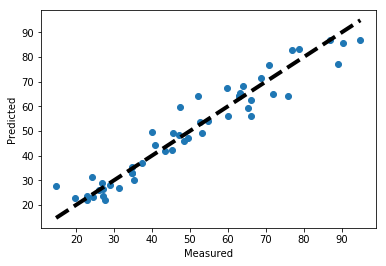

In [45]:
fit_scatter(y, y_pred)

In [15]:
exam_scores_fit = np.polyfit(df["revision_time"].values, y, 1)

In [16]:
np.polyval(exam_scores_fit[::-1], [y])

array([[ 496.88472582,  413.05199149,  355.18879121,  439.59425131,
         412.62244716,  486.21770838,  469.21491214,  485.35861973,
         561.33427243,  265.09186879,  519.50739366,  482.90663754,
         633.21135634,  435.0661382 ,  621.61365954,  621.90002242,
         625.13950255,  668.41609341,  779.82915302,  810.43418626,
         733.8858078 ,  866.27494867,  888.70074203,  846.90965863,
         817.25320244,  953.27557241,  716.56085331,  944.59519748,
         984.02378709, 1183.85138717, 1076.51899866, 1172.52215557,
         848.71732434, 1183.60081965, 1127.49159204, 1127.06204771,
         933.30176124, 1357.85263465, 1286.61986722, 1135.06231079,
        1071.61503427, 1146.58841688, 1231.26234218, 1268.00627975,
        1593.85144653, 1378.79292055, 1409.95278188, 1619.10507338,
        1700.73639303, 1557.96659761]])

To estimate the paramaters we use the formula $\beta = (X^{T}X)^{−1}X^{T}y$

In [17]:
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [18]:
coeffs

array([17.89768026,  1.44114091])

MSE = $\frac{1}{n}\sum_{t=1}^{n}(y_{i} - \hat{y_{i}})^2$

Mean Squared Error is prone to outliers. When we calculate our mean there is a chance that it might be a very large value due to one large outlier. This can produce high errors

In [38]:
mse_sklearn_model = mean_squared_error(y, y_pred)

In [39]:
mse_sklearn_model

30.9854726145413

In [42]:
np.square(np.subtract(y,y_pred)).mean() 

30.9854726145413

In [21]:
def np_model_predict(coeffs, val):
    return np.dot(val.T, coeffs)

In [22]:
def predict_vals(coeffs, X):
    return np.array([np_model_predict(coeffs, x) for x in X])

In [23]:
y_pred_np = predict_vals(coeffs, X)
y_pred_np

array([21.82190694, 21.99628499, 22.65776867, 23.06849383, 23.73430093,
       23.77753515, 26.07471376, 26.63099415, 27.04460159, 27.72482009,
       28.12689841, 28.72785416, 29.93985366, 31.17635256, 32.8336646 ,
       33.04407117, 35.3383675 , 36.90200538, 41.95320425, 42.36392941,
       44.31379306, 46.14260086, 47.1831046 , 48.56515873, 48.99461872,
       49.31166972, 49.67195494, 53.85270471, 54.13805061, 56.08070855,
       56.13835418, 59.23968941, 59.77002927, 62.63501739, 64.26783003,
       64.30674084, 64.33988708, 64.400415  , 65.03884042, 65.29104007,
       67.60118895, 68.17764531, 71.65079489, 76.80431477, 77.34330147,
       83.05598402, 83.32115394, 85.52033496, 86.81015607, 87.08829627])

In [24]:
mean_squared_error(y, y_pred_np)

30.98547261454129

MSE of the sklearn model is $30.9854726145413$ , and of closed form solution model is $30.98547261454129$. As we can see the difference is of the order $10^{-14}$ and hence completely negligible.

In [25]:
30.98547261454129 - 30.9854726145413

-1.0658141036401503e-14

In [26]:
w0 = 20
w1 = np.linspace(-2, 2, 100)
predicted_values_arr = np.array([predict_vals([w0, w1_i], X) for w1_i in w1])
mse_val_arr = []
for i, predicted_scores in enumerate(predicted_values_arr):
    mse = mean_squared_error(y, predicted_scores)
    mse_val_arr.append(mse)
mse_val_arr = np.array(mse_val_arr)

Text(0.5, 0, 'w1')

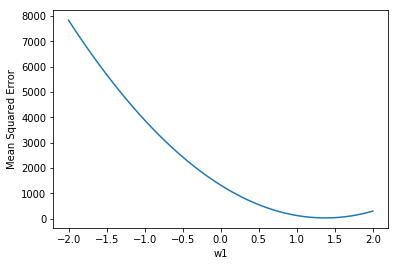

In [27]:
plt.plot(w1, mse_val_arr)
plt.ylabel("Mean Squared Error")
plt.xlabel("w1")

In [130]:
w1[np.argmin(mse_val_arr)]

1.3535353535353538

The plot is in the shape of an half-parabola, if we extend the x-axis we will see the full parabolic graph. The minima of the plot is at $w1 = 1.3535353535353538$. This can be explained by its closeness to the actual value of $\beta = 1.44114091$, which we found when we fitted our model. The slight discrepancy can be explained by choosing an non optimal value for $w0$ instead of $17.89768026$.


- - -
